In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

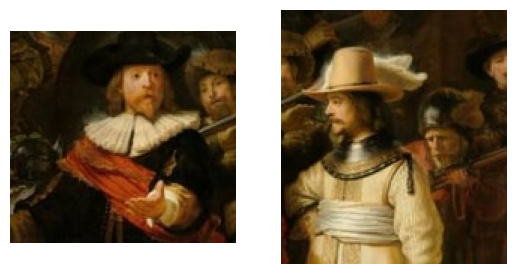

In [13]:
a = plt.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\Screenshot 2024-12-09 090344.jpg") / 255
plt.subplot(121); plt.imshow(a); plt.axis('off')
b = plt.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\Screenshot 2024-12-09 090348.jpg") / 255
plt.subplot(122); plt.imshow(b); plt.axis('off')
plt.show()

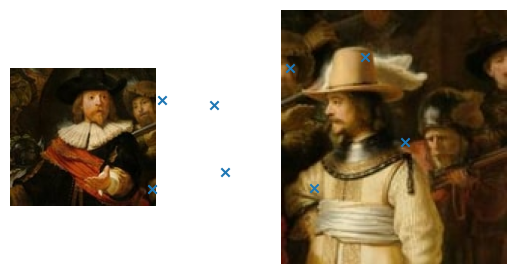

In [15]:
xy = np.array([[ 157, 32],
               [ 211, 37],
               [ 222,107],
               [ 147,124]])

xaya = np.array([[  6, 38],
                 [ 56, 31],
                 [ 82, 87],
                 [ 22,118]])

plt.subplot(121); plt.imshow(a); plt.axis('off')
plt.scatter(xy[:,0], xy[:,1], marker='x')
plt.subplot(122); plt.imshow(b); plt.axis('off')
plt.scatter(xaya[:,0], xaya[:,1], marker='x')
plt.show()

In [17]:
from skimage.transform import warp

In [18]:
P = cv2.getPerspectiveTransform(xy.astype(np.float32), xaya.astype(np.float32))
print(P)

[[ 1.01685498e+00  3.12932553e-01 -1.63082057e+02]
 [-2.17037452e-01  9.92701412e-01  4.39692054e+01]
 [ 4.93917724e-04  5.87218302e-04  1.00000000e+00]]


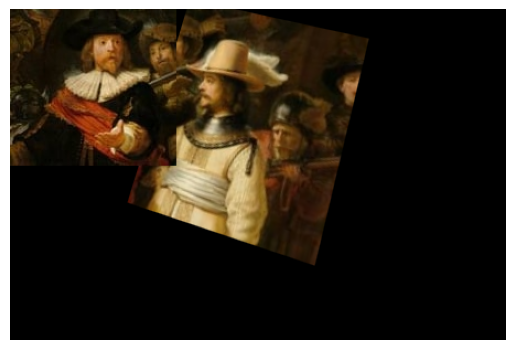

In [23]:
f_stitched = warp(b, P, output_shape=(300,450))
M, N = a.shape[:2]
f_stitched[0:M, 0:N, :] = a
plt.imshow(f_stitched); plt.axis('off')
plt.show()

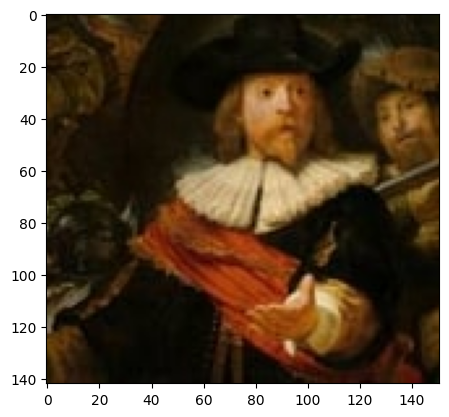

In [27]:
c = plt.imread(r"C:\Users\ch.en.u4aie22062\Downloads\22062 NLP\22062 CV\Screenshot 2024-12-09 090344.jpg")
fcv2 = c[:,:,::-1]
plt.imshow(c)

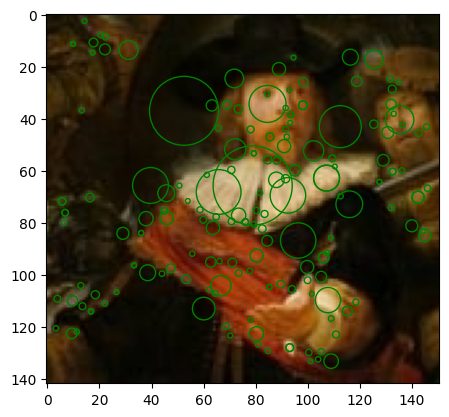

In [31]:
fcv2 = c[:, :, ::-1]
sift = cv2.SIFT_create()
kps, dscs = sift.detectAndCompute(fcv2, mask=None)
fig, ax = plt.subplots()
ax.imshow(c)
for kp in kps:
    ax.add_artist(plt.Circle(kp.pt, kp.size / 2, color='green', fill=False))
plt.show()